In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


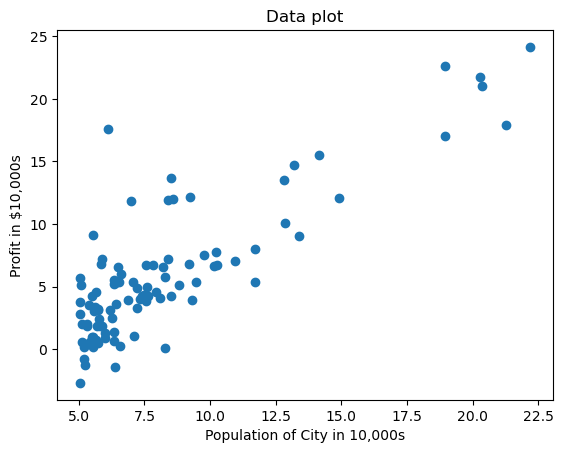

In [4]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x,y)
plt.title('Data plot')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [5]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [6]:
def computeCost(X, y, theta):
    sum = (theta.T@X-y)**2
    return sum.sum()/(2*X.shape[1])

In [7]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = []
    for i in range(it):
        theta0 = theta[0,0]-alpha*(theta.T@X-y).sum()/(X.shape[1])
        theta1 = theta[1,0]-alpha*(theta.T@X-y)@X[1,:].T/(X.shape[1])
        theta[0,0] = theta0
        theta[1,0] = theta1
        cost.append(computeCost(X,y,theta))
 
 
    return theta, cost


In [8]:
alpha = 0.01
it = 1400

theta, cost = simple_gradient(X,y,theta,alpha,it)
print(theta,cost)

[[-3.5777981]
 [ 1.1610888]] [6.737190626032324, 5.9315936244916925, 5.90115471432105, 5.895228586968583, 5.890094942630679, 5.885004158570093, 5.879932480237703, 5.8748790940547515, 5.869843912185118, 5.86482686497116, 5.859827888307566, 5.854846918032023, 5.849883891765582, 5.844938738947723, 5.840011399474802, 5.835101806744067, 5.830209900106663, 5.825335611798346, 5.820478884421978, 5.8156396467556, 5.810817841790093, 5.806013402865255, 5.801226268668952, 5.796456380179126, 5.791703667242916, 5.786968076338893, 5.782249542817853, 5.7775480043330845, 5.7728634048, 5.768195679166978, 5.763544760621783, 5.75891060373552, 5.754293128934258, 5.749692295174034, 5.745108023330744, 5.740540272671186, 5.735988974507847, 5.731454064413909, 5.7269354921390265, 5.72243319362845, 5.717947106997431, 5.713477186481298, 5.709023364614855, 5.704585582110257, 5.700163787694065, 5.695757916541502, 5.691367917723451, 5.68699373660073, 5.6826353029839405, 5.678292562642351, 5.67396546924428, 5.6696539

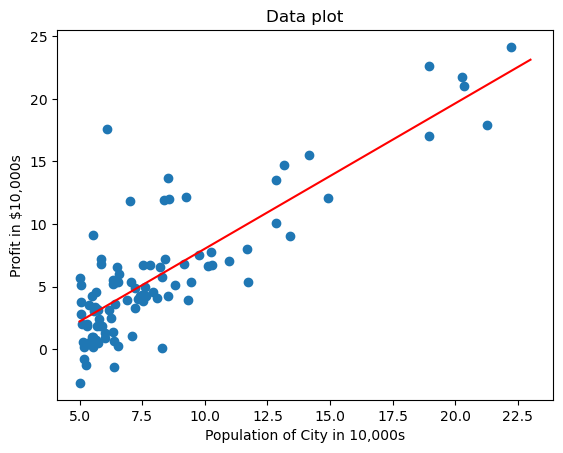

In [9]:
plt.scatter(x,y)
line_x = np.linspace(5,23)
plt.plot(line_x,theta[1,0] * line_x + theta[0,0], 'r')
plt.title('Data plot')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

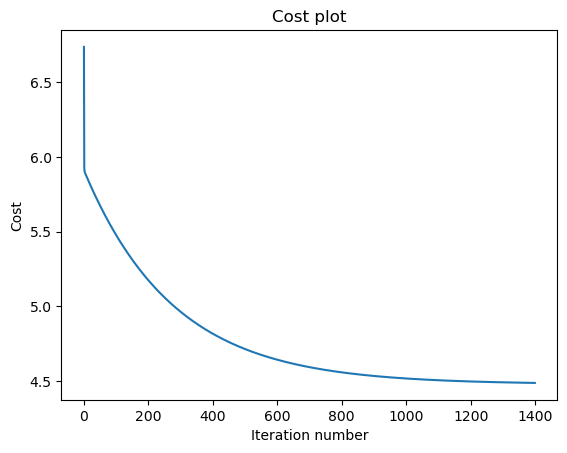

In [10]:
plt.plot(cost)
plt.title('Cost plot')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.show()

Linear regression with multiple variables

In [11]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [12]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [13]:
# feature normalization
for i in data2:
    data2[i] = (data2[i] - data2[i].mean()) / data2[i].std()

data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [14]:
data2.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


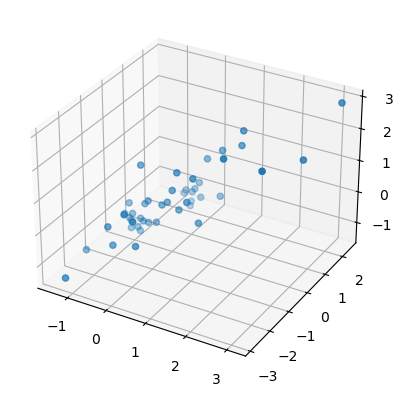

In [15]:
ax = plt.axes(projection ='3d') 
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)
plt.show()

In [16]:
x1 = data2.values[:, 0]
x2 = data2.values[:, 1]
y = data2.values[:, 2]


In [17]:
X = np.stack([np.ones(x1.shape, dtype=np.float32), x1,x2], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [18]:
def computeCost(X, y, theta):
    sum = (theta.T@X-y)**2
    return sum.sum()/(2*X.shape[1])

In [19]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = []
    for i in range(it):
        theta0 = theta[0,0]-alpha*(theta.T@X-y).sum()/(X.shape[1])
        theta1 = theta[1,0]-alpha*(theta.T@X-y)@X[1,:].T/(X.shape[1])
        theta[0,0] = theta0
        theta[1,0] = theta1
        cost.append(computeCost(X,y,theta))
 
 
    return theta, cost

In [20]:
alpha = 0.01
it = 1400

theta, cost = simple_gradient(X,y,theta,alpha,it)
print(theta)


[[-1.1111086e-16]
 [ 8.5498458e-01]
 [ 0.0000000e+00]]


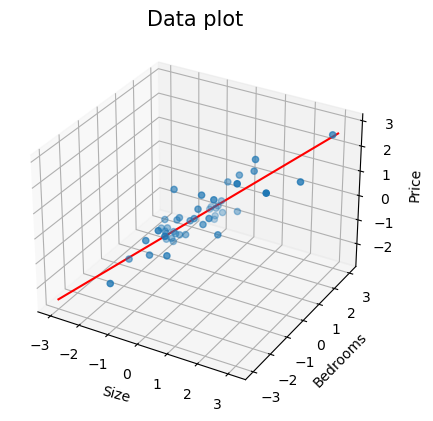

<Figure size 640x480 with 0 Axes>

In [21]:
ax = plt.axes(projection ='3d') 
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)
line_x = np.linspace(-3,3)
line_y = np.linspace(-3,3)
plt.figure()
ax.plot(line_x,line_y, theta[2,0] * line_y + theta[1,0] * line_x + theta[0,0], 'r')
ax.set_xlabel('Size', rotation=-15)
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Data plot',fontsize = 15)
plt.show()

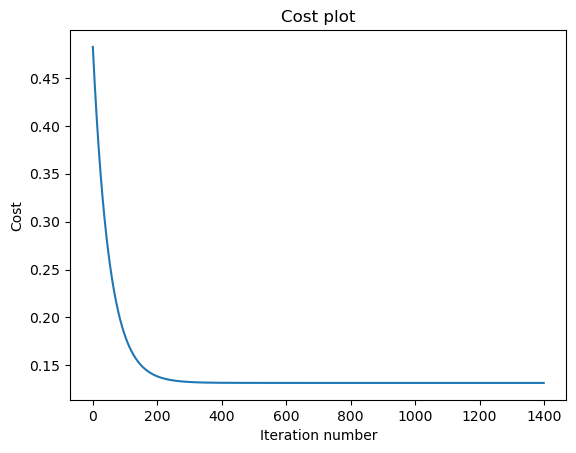

In [22]:
plt.plot(cost)
plt.title('Cost plot')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.show()

Linear regression - Python packages

Coefficients: 
 [[1.22131161]]
Residual sum of squares: 5.880668631767232


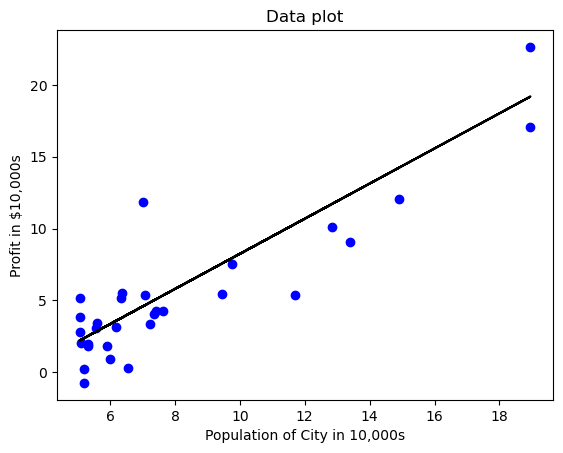

In [23]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
# Data import
 
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
# Normalization


X = data['Population'].values.reshape(-1, 1)
y = data['Profit'].values.reshape(-1, 1)

# Split into train and test sets (70-30%)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_predicted, color ='k')
plt.title('Data plot')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()